<a href="https://colab.research.google.com/github/SankitSinghal/Machine-Learning-project/blob/main/Lab_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
#Loading the dataset
df=pd.read_csv('/content/Play Tennis.csv')
print(df)

     Outlook Temperature Humidity    Wind Play Tennis
0      Sunny         Hot     High    Weak          No
1      Sunny         Hot     High  Strong          No
2   Overcast         Hot     High    Weak         Yes
3       Rain        Mild     High    Weak         Yes
4       Rain        Cool   Normal    Weak         Yes
5       Rain        Cool   Normal  Strong          No
6   Overcast        Cool   Normal  Strong         Yes
7      Sunny        Mild     High    Weak          No
8      Sunny        Cool   Normal    Weak         Yes
9       Rain        Mild   Normal    Weak         Yes
10     Sunny        Mild   Normal  Strong         Yes
11  Overcast        Mild     High  Strong         Yes
12  Overcast         Hot   Normal    Weak         Yes
13      Rain        Mild     High  Strong          No


In [ ]:
#Encode Categorical Variables
encoder=LabelEncoder()
for i in df.columns:
  df[i]=encoder.fit_transform(df[i])
print(df)

    Outlook  Temperature  Humidity  Wind  Play Tennis
0         2            1         0     1            0
1         2            1         0     0            0
2         0            1         0     1            1
3         1            2         0     1            1
4         1            0         1     1            1
5         1            0         1     0            0
6         0            0         1     0            1
7         2            2         0     1            0
8         2            0         1     1            1
9         1            2         1     1            1
10        2            2         1     0            1
11        0            2         0     0            1
12        0            1         1     1            1
13        1            2         0     0            0


In [ ]:
#Split Features and Target
x=df.drop('Play Tennis',axis=1)
y=df['Play Tennis']

In [ ]:
#Split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
#Train Decision Tree
model=DecisionTreeClassifier(criterion="entropy",random_state=42)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
#Predict on test data
y_pred = model.predict(x_test)
print("Actual values:\n",y_test)
print("Predicted values: ",y_pred)

Actual values:
 9     1
11    1
0     0
Name: Play Tennis, dtype: int64
Predicted values:  [1 1 0]


In [ ]:
#Evaluate the model
accuracy = model.score(x_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


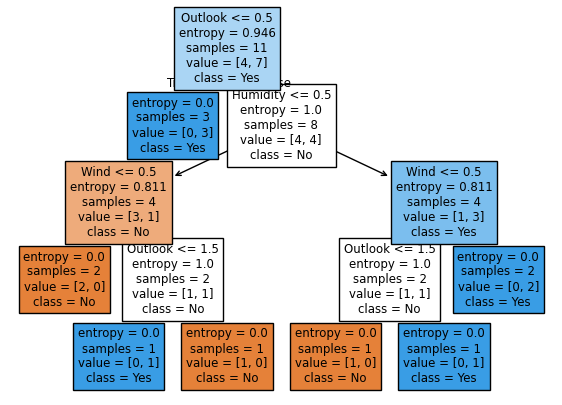

In [ ]:
#Visualize Decision Tree
plt.figure(figsize=(7, 5))
plot_tree(model, filled=True, feature_names=['Outlook', 'Temperature', 'Humidity', 'Wind'], class_names=['No', 'Yes'])
plt.show()